In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def function(x):
    return np.cos(x)

In [19]:
def function2(x):
    return 2*x-4

In [20]:
def function3(x):
    return x**2

In [21]:
def function4(x):
    return np.tan(x)

In [22]:
def boundaryFinder(func):
    y=func
    ymin=y.min()
    ymax=y.max()
    for i in range(len(y)):
        if(ymin>y[i]):
            ymin=y[i]
        elif(ymax<y[i]):
            ymax=y[i]
    if(ymin==y.min() and ymax==y.max()):
        return ymin,ymax

In [23]:
def generateSample(a,b,n,ymin,ymax):
    x=np.random.uniform(a,b,n)
    y=np.random.uniform(ymin,ymax,n)
    return x,y

In [24]:
def placePoints(y,func):
    ir = np.where((y)<func)[0]
    ur = np.where((y)>func)[0]
    return ir,ur

In [25]:
def computeIntegral(a,b,ymin,ymax,n,ir):
    mf = (b-a)*(ymax-ymin) #mf is the factor that multiplies the
    #fraction of points under the curve.
    ans=mf*len(ir)/float(n)
    return ans

In [26]:
def plotter(xf,x,y,ymin,ymax,func,ir,ur):
    fig = plt.figure(figsize=(7,7))
    plt.xlim(xf[0],xf[-1])
    plt.ylim([ymin,ymax])
    plt.plot(x[ir],y[ir],'.',color='blue')
    plt.plot(x[ur],y[ur],'.',color="0.75")
    yc = func
    plt.plot(xf,yc,color='green')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [27]:
def monteCarlo(a,b,n,fn):
    xf=np.linspace(a,b,n)
    if(fn==1):
        ymin,ymax=boundaryFinder(function(xf))
        x,y=generateSample(a,b,n,ymin,ymax)
        ir,ur=placePoints(y,function(x))
        plotter(xf,x,y,ymin,ymax,function(xf),ir,ur)
    elif(fn==2):
        ymin,ymax=boundaryFinder(function2(xf))
        x,y=generateSample(a,b,n,ymin,ymax)
        ir,ur=placePoints(y,function2(x))
        plotter(xf,x,y,ymin,ymax,function2(xf),ir,ur)
    elif(fn==3):
        ymin,ymax=boundaryFinder(function3(xf))
        x,y=generateSample(a,b,n,ymin,ymax)
        ir,ur=placePoints(y,function3(x))
        plotter(xf,x,y,ymin,ymax,function3(xf),ir,ur)
    elif(fn==4):
        ymin,ymax=boundaryFinder(function4(xf))
        x,y=generateSample(a,b,n,ymin,ymax)
        ir,ur=placePoints(y,function4(x))
        plotter(xf,x,y,ymin,ymax,function4(xf),ir,ur)
    return computeIntegral(a,b,ymin,ymax,n,ir)

In [28]:
def monteCarloWrap(a,b,n,fn,tol,ex,imax):
    i=0
    ans=monteCarlo(a,b,n,fn)
    N=n
    while(abs(ex-ans)>tol and i<imax):
        print(ans)
        i+=1
        N*=2
        ans=monteCarlo(a,b,N,fn)
    error=abs(ex-ans)
    if(imax==i):
        print("The maximum number of iterations has been reached")
    return ans,error

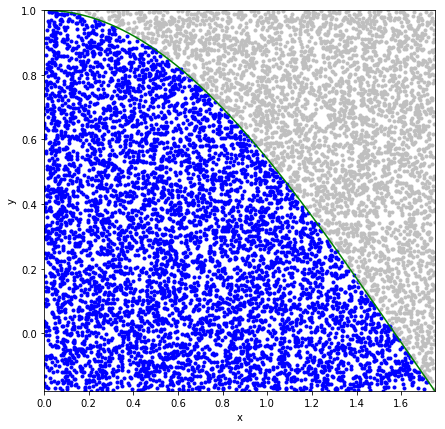

1.300253434711997


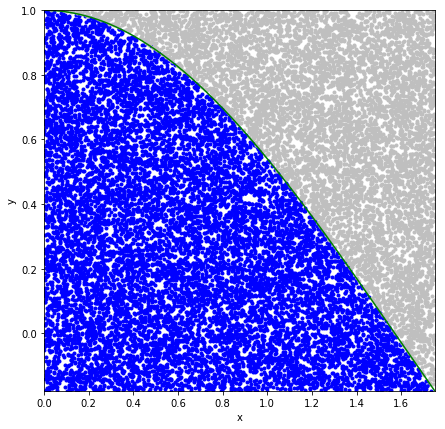

1.3034494271379462


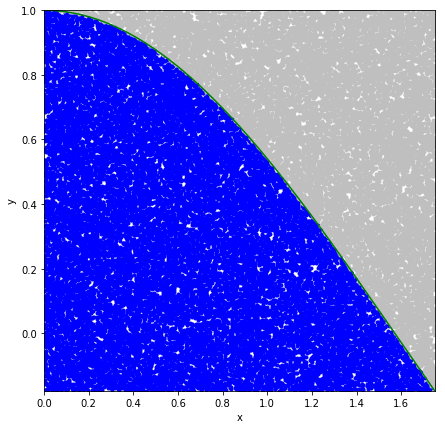

1.3020576239847104


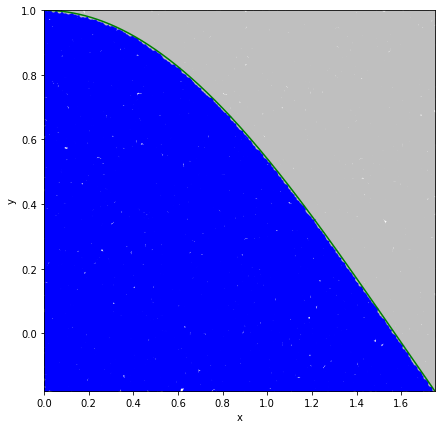

1.2999183709899216


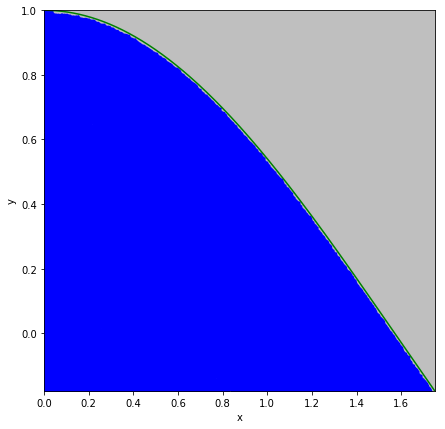

1.2967094914977388


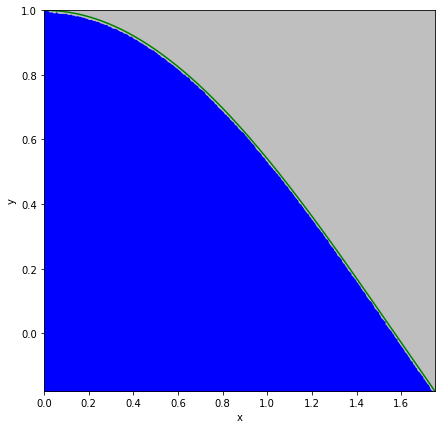

1.2961102429178732


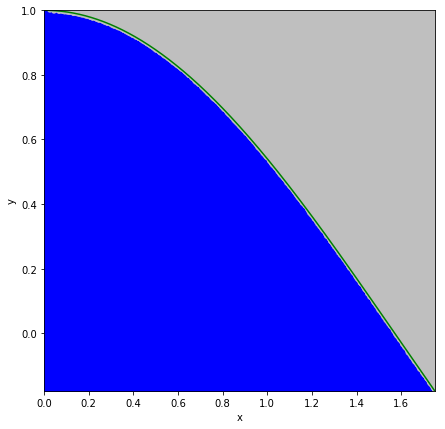

1.2938872239925658


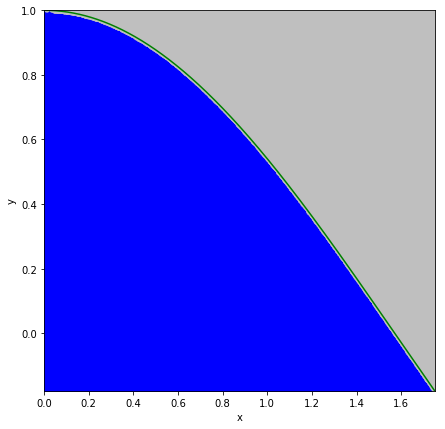

1.295945932823394


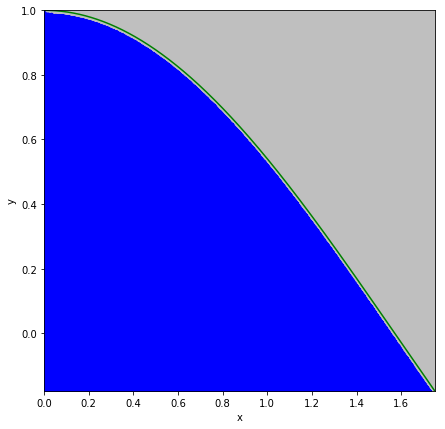

1.2957316853472594


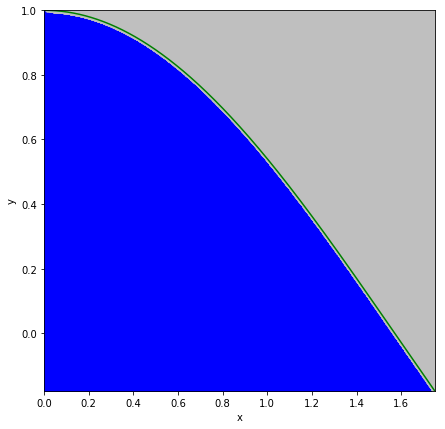

1.2957868580995722


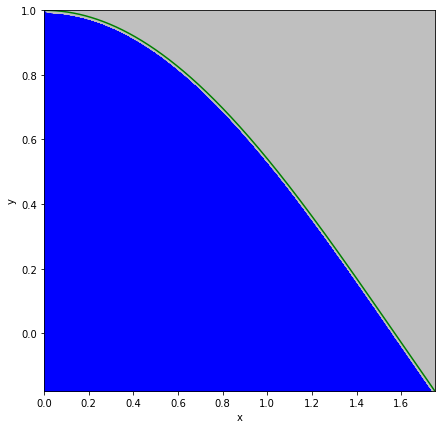

The maximum number of iterations has been reached


(1.2959473423462633, 0.31196134234626327)

In [29]:
a1=0; b1=1.75; n=10000; tol=.05; ex1=0.983986; imax=10
monteCarloWrap(a1,b1,n,1,tol,ex1,imax)
#ymin1,ymax1=boundaryFinder(function(np.linspace(a1,b1,n)))
#print(ymin1,ymax1)
#xf=np.linspace(a1,b1,n)
#x1,y1 = generateSample(a1,b1,n,ymin1,ymax1)
#ir1,ur1 = placePoints(y1,function(x1))
#plotter(xf,x1,y1,ymin1,ymax1,function(xf),ir1,ur1)
#print(computeIntegral(a1,b1,ymin1,ymax1,n,ir1))

#a2=a1; b2=5
#xf2=np.linspace(a2,b2,n)
#ymin2,ymax2=boundaryFinder(function2(xf2))
#x2,y2 = generateSample(a2,b2,n,ymin2,ymax2)
#ir2,ur2 = placePoints(y2,function2(x2))
#plotter(xf2,x2,y2,ymin2,ymax2,function2(xf2),ir2,ur2)
#print(computeIntegral(a2,b2,ymin2,ymax2,n,ir2))

#a3=-5; b3=5
#xf3=np.linspace(a3,b3,n)
#ymin3,ymax3 = boundaryFinder(function3(xf3))
#x3,y3 = generateSample(a3,b3,n,ymin3,ymax3)
#ir3,ur3 = placePoints(y3,function3(x3))
#plotter(xf3,x3,y3,ymin3,ymax3,function3(xf3),ir3,ur3)
#print(computeIntegral(a3,b3,ymin3,ymax3,n,ir3))

#a4=.5; b4=2
#xf4=np.linspace(a4,b4,n)
#ymin4,ymax4 = boundaryFinder(function4(xf4))
#x4,y4 = generateSample(a4,b4,n,ymin4,ymax4)
#ir4,ur4 = placePoints(y4,function4(x4))
#plotter(xf4,x4,y4,ymin4,ymax4,function4(xf4),ir4,ur4)
#print(computeIntegral(a4,b4,ymin4,ymax4,n,ir4))

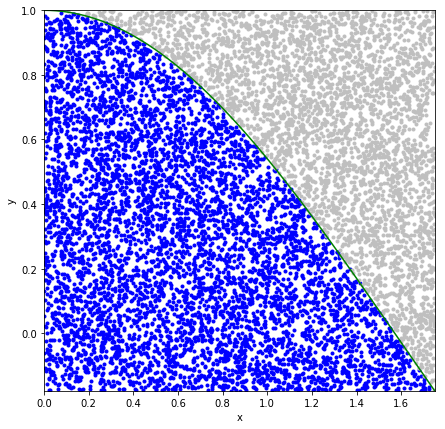

In [30]:
ymin,ymax=boundaryFinder(function(np.linspace(0,1.75,10000)))
x=np.random.uniform(0,1.75,10000)
y=np.random.uniform(ymin,ymax,10000)
ir = np.where((y)<function(x))[0]
ur = np.where((y)>=function(x))[0]
fig = plt.figure(figsize=(7,7))
plt.xlim([0,1.75])
plt.ylim([ymin,ymax])
plt.plot(x[ir],y[ir],'.',color='blue')
plt.plot(x[ur],y[ur],'.',color="0.75")
theta=np.linspace(0,2*np.pi,1000)
xc = np.linspace(0,1.75,10000)
yc = np.cos(xc)
plt.plot(xc,yc,color='green')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [31]:
print(np.sin(1.75))

0.9839859468739369
